#### Instituto Tecnológico de Costa Rica
#### IF 6008 Tópicos de Astronomí y Astrofísica.
#### Tarea Programada.
#### Primer Semestre 2022
Estudiante:
* Reiner Ureña Vega 2019061777


## Aplicaciones de la librería Einstenpy en Python

Esta librería permite:
* La graficación de geodésicas.
* El estudio de lentes gravitacionales y trazado de rayos.
* Resolver y simular ecuaciones hidrodinámicas relativistas.
* Visualización del horizonte de eventos de agujeos negros.
* Resolución de las ecuaciones de campo de Einstein.


### 1. Animación de geodésicas para una partícula de prueba.

Permite observar la geodésica para una partícula de prueba con una posición inicial y un momentum determinada. 
Se puede animar la trayectoria que sigue la pertícula alrededor de un agujero negro.

Para este ejemplo, se puede reproducir la trayectoria de un partícula en los alrededores de un agujeo negro de Kerr.

Se pueden observr la región de:
* El Horizonte de Eventos.
* La ergosfera.



<IPython.core.display.Javascript object>


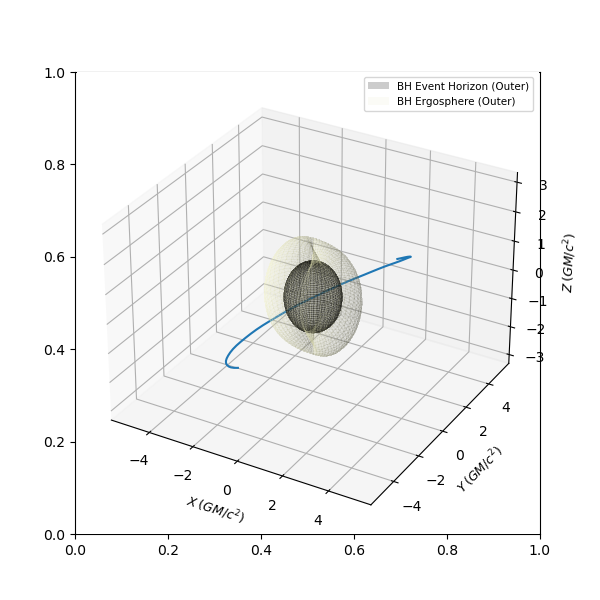

MovieWriter imagemagick unavailable; using Pillow instead.


In [1]:
#Se importan las librerías necesarias.

import numpy as np

from einsteinpy.geodesic import Timelike
from einsteinpy.plotting import StaticGeodesicPlotter

# Órbita de radio estable
position = [4, np.pi / 3, 0.]
momentum = [0., 0.767851, 2.]
a = 0.99
steps = 400.
delta = 0.5

#Cálculo de Geodésicas

geod = Timelike(
    metric="Kerr",
    metric_params=(a,),
    position=position,
    momentum=momentum,
    steps=steps,
    delta=delta,
    return_cartesian=True
)

#Animación

%matplotlib nbagg
sgpl = StaticGeodesicPlotter()
sgpl.animate(geod, interval=1)
sgpl.show()

sgpl.ani.save('animation.gif', writer='imagemagick', fps=60)

### 2. Visualización del Frame-Dragging en un espacio-tiempo de Kerr.
Debido a la rotación del agujero negro el espacio-tiempo a su alrededor es "arrastrado".
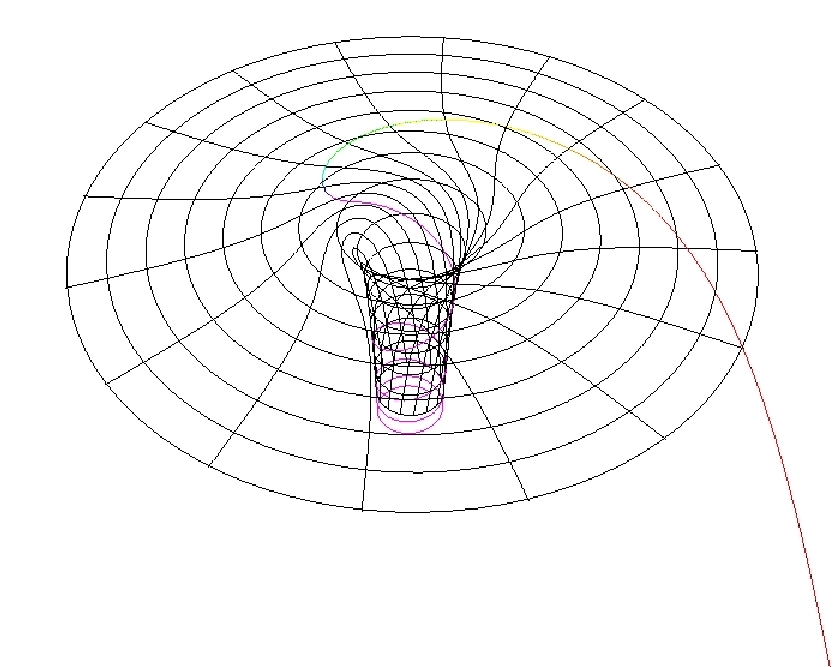

#### Implementación

In [4]:
import numpy as np

from einsteinpy.geodesic import Nulllike
from einsteinpy.plotting import StaticGeodesicPlotter

Se establece un momento para el momentum de la partícula de prueba, con dirección contraria a la otación del agujero negro.

<IPython.core.display.Javascript object>


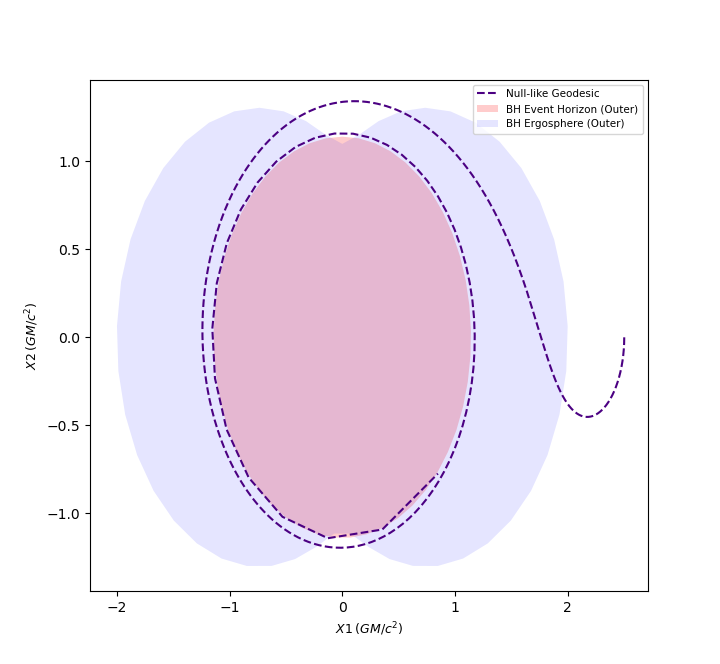

In [39]:
#Características de la partícula de prueba.
position = [2.5, np.pi / 2, 0]
momentum = [0., 0., -2]
#Parámetros para el agujero negro.
a = 0.99    #J/M
steps = 7440
delta = 0.0005
omega = 0.01
suppress_warnings = True

#Cálculo de la geodésica
geod = Nulllike(
    metric="Kerr",
    metric_params=(a,),
    position=position,
    momentum=momentum,
    steps=steps,
    delta=delta,
    return_cartesian=True,
    omega=omega,
    suppress_warnings=suppress_warnings
)

#Graficación
sgpl = StaticGeodesicPlotter(bh_colors=("red", "blue"))
sgpl.plot2D(geod, coordinates=(1, 2), figsize=(6, 6), color="indigo") # Plot X vs Y
sgpl.show()
